<a href="https://colab.research.google.com/github/Faiqazmi/DataScience_Portofolio/blob/main/Project_Donasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**sesuai dengan goals, berikut:**

1. Forecasting
2. Dashboard
3. Analytical Insight

**Objektif pengerjaan dataset yang bisa teman-teman perhatikan sebagai berikut:**

1. Data Understanding : kolom, info, type, value count.
2. Data Preparation : preparation
3. Data Analyst (Insight)
4. Data Pre-Processing
5. Data Modelling (Forecasting)
6. Data Visualisasi (Dashboard - Google Data Studio)

In [ ]:
pip install pmdarima

# Data Preparation

In [ ]:
# import library yang dibutuhkan
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hardiawan3010/datase_zakat/main/donasi.csv', delimiter=',')
df

,ID,name,platform,judul,tanggal,total_donasi,status,metode_pembayaran,Class
0,27022,PUTU DARMA PUTRA,IOS,Berkah Dengan Sedekah,2021-01-05 05:32:07,20000.0,settlement,gopay,donasi_guest
1,27045,Hamba Allah,PWA,PANTI ASUHAN YATIM DAN DHUAFA SALIHARA,2021-01-05 14:28:26,130662.0,settlement,Transfer Bank Mandiri - 1320505050535,donasi_guest
2,27055,Evi Wirawan,PWA,Infaq Sedekah,2021-01-05 19:22:49,25000.0,settlement,bank_transfer,donasi_guest
3,27061,Achmadi,PWA,PANTI ASUHAN YATIM DAN DHUAFA BALIKPAPAN,2021-01-05 21:11:39,100140.0,settlement,Transfer Bank Mandiri - 1320505050535,donasi_guest
4,27083,Lia Soraya,PWA,BANTU BIAYA MAKAN UNTUK 47 PANTI YATIM DHUAFA,2021-01-06 00:30:37,50000.0,settlement,bank_transfer,donasi_guest
...,...,...,...,...,...,...,...,...,...
9076,43379,Mahfud Rofi,WEB,"Tak ada lagi Orangtua, Nur Ingin Tetap Sekolah",2021-12-06 08:25:29,100000.0,settlement,Mandiri - 1320006531140,donasi_user
9077,43380,Mahfud Rofi,WEB,Berkah Dengan Sedekah,2021-12-06 08:27:10,200000.0,settlement,Mandiri - 1320006531140,donasi_user
9078,43381,Sari Rafif Pasha,WEB,Berkah Dengan Sedekah,2021-12-06 08:28:33,10000.0,settlement,BCA - 1393004952,donasi_user
9079,43382,Lestari,WEB,Berkah Dengan Sedekah,2021-12-06 08:51:37,150000.0,settlement,Mandiri Syariah - 7277777775,donasi_user


In [ ]:
donasi_user = df[df['Class'] == 'donasi_user ']
donasi_user

,ID,name,platform,judul,tanggal,total_donasi,status,metode_pembayaran,Class
2873,26790,Alvandha Adindra,Web,PANTI ASUHAN YATIM DAN DHUAFA MALANG,2021-01-01 00:49:21,50000.0,settlement,bank_transfer,donasi_user
2874,26791,Ruhendi Tirta Kusumah,Android,Sedekah Bantu Lansia Dhuafa Jalani Sisa Hidup ...,2021-01-01 04:49:33,100000.0,settlement,echannel,donasi_user
2875,26792,Ibu Ari /JBB/Najumas/HS2/Koalum,PWA,PANTI ASUHAN YATIM DAN DHUAFA SUKASARI,2021-01-01 05:14:41,100000.0,settlement,bank_transfer,donasi_user
2876,26793,Widiastutiningtyas,PWA,Masjid Untuk Santri Yatim Penghafal Alquran,2021-01-01 05:37:13,1000720.0,settlement,Transfer Bank Mandiri - 1320505050535,donasi_user
2877,26794,abdul basit,Android,Lunasi Hutang Puasa dengan Membayar Fidyah,2021-01-01 05:42:34,5000.0,SUCCESS_COMPLETED,LINKAJA,donasi_user
...,...,...,...,...,...,...,...,...,...
9076,43379,Mahfud Rofi,WEB,"Tak ada lagi Orangtua, Nur Ingin Tetap Sekolah",2021-12-06 08:25:29,100000.0,settlement,Mandiri - 1320006531140,donasi_user
9077,43380,Mahfud Rofi,WEB,Berkah Dengan Sedekah,2021-12-06 08:27:10,200000.0,settlement,Mandiri - 1320006531140,donasi_user
9078,43381,Sari Rafif Pasha,WEB,Berkah Dengan Sedekah,2021-12-06 08:28:33,10000.0,settlement,BCA - 1393004952,donasi_user
9079,43382,Lestari,WEB,Berkah Dengan Sedekah,2021-12-06 08:51:37,150000.0,settlement,Mandiri Syariah - 7277777775,donasi_user


In [ ]:
donasi_guest = df[df['Class'] == 'donasi_guest ']
donasi_guest

,ID,name,platform,judul,tanggal,total_donasi,status,metode_pembayaran,Class
0,27022,PUTU DARMA PUTRA,IOS,Berkah Dengan Sedekah,2021-01-05 05:32:07,20000.0,settlement,gopay,donasi_guest
1,27045,Hamba Allah,PWA,PANTI ASUHAN YATIM DAN DHUAFA SALIHARA,2021-01-05 14:28:26,130662.0,settlement,Transfer Bank Mandiri - 1320505050535,donasi_guest
2,27055,Evi Wirawan,PWA,Infaq Sedekah,2021-01-05 19:22:49,25000.0,settlement,bank_transfer,donasi_guest
3,27061,Achmadi,PWA,PANTI ASUHAN YATIM DAN DHUAFA BALIKPAPAN,2021-01-05 21:11:39,100140.0,settlement,Transfer Bank Mandiri - 1320505050535,donasi_guest
4,27083,Lia Soraya,PWA,BANTU BIAYA MAKAN UNTUK 47 PANTI YATIM DHUAFA,2021-01-06 00:30:37,50000.0,settlement,bank_transfer,donasi_guest
...,...,...,...,...,...,...,...,...,...
2868,43371,Prajitno,CFD v2,"Tak ada lagi Orangtua, Nur Ingin Tetap Sekolah",2021-12-06 03:31:41,20000.0,settlement,gopay,donasi_guest
2869,43372,Yudi,CFD v2,"Ingin Jadi Pramugari, Yatim ini Berusaha Bahag...",2021-12-06 04:25:45,20000.0,settlement,gopay,donasi_guest
2870,43373,Taufik,CFD v2,"Tak ada lagi Orangtua, Nur Ingin Tetap Sekolah",2021-12-06 04:45:15,20000.0,settlement,MANDIRI,donasi_guest
2871,43374,Fajar sovin namiya,CFD v2,Jika Tidak Direnovasi Dengan Segera! Musholla ...,2021-12-06 04:51:17,20000.0,settlement,bank_transfer,donasi_guest


In [ ]:
df.dtypes

ID                     int64
name                  object
platform              object
judul                 object
tanggal               object
total_donasi         float64
status                object
metode_pembayaran     object
Class                 object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9081 entries, 0 to 9080
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 9081 non-null   int64  
 1   name               9067 non-null   object 
 2   platform           9077 non-null   object 
 3   judul              9081 non-null   object 
 4   tanggal            9081 non-null   object 
 5   total_donasi       9081 non-null   float64
 6   status             9081 non-null   object 
 7   metode_pembayaran  9081 non-null   object 
 8   Class              9081 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 638.6+ KB


In [ ]:
df.describe()

,ID,total_donasi
count,9081.000000,9.081000e+03
mean,35426.746724,2.201206e+05
std,4782.463434,5.423347e+05
min,26790.000000,1.000000e+00
25%,31318.000000,2.500000e+04
50%,35627.000000,1.000000e+05
75%,39496.000000,2.000000e+05
max,43384.000000,2.000063e+07


In [ ]:
# Cek berapa jumlah value berdasarkan kolom keterangan
df['Class'].value_counts()

donasi_user      6208
donasi_guest     2873
Name: Class, dtype: int64

In [ ]:
# Cek berapa jumlah value berdasarkan kolom platform
df['platform'].value_counts()

PWA           2083
Web Mobile    2043
WEB           1620
Android       1459
Web            805
CFD v2         686
IOS            279
Quick          102
Name: platform, dtype: int64

In [ ]:
df['metode_pembayaran'].value_counts()

bank_transfer                                 3640
gopay                                         1304
MANDIRI                                        627
BCA - 1393004952                               453
BNI                                            410
OVO                                            323
DANA                                           253
BCA Yayasan Mizan Amanah                       245
echannel                                       214
Mandiri - 1320006531140                        193
BRI                                            187
Transfer Bank Mandiri Syariah - 7277777775     155
Mandiri Yayasan Mizan Amanah                   154
LINKAJA                                        146
Transfer Bank Mandiri - 1320505050535          110
BCA - 1393040002                               107
Mandiri - 1320505050535                        105
PERMATA                                         77
OFFLINE_DONATION                                54
Mandiri - 1320020040060        

## Replace Unik value yang sama

In [ ]:
# Menjadikan 1 unik value yang sama
df.loc[:,["platform"]]=df["platform"].str.replace('Web', 'WEB', regex=False)
df['platform'].value_counts()

WEB           2425
PWA           2083
WEB Mobile    2043
Android       1459
CFD v2         686
IOS            279
Quick          102
Name: platform, dtype: int64

In [ ]:
# Menjadikan 1 unik value yang sama
df.loc[:,["metode_pembayaran"]]=df["metode_pembayaran"].str.lower()
daftar_singkatan=['yayasan mizan amanah', 'mizan amanah', 'transfer', 'bank', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0','syariah', '_va','-', 'gani',' ',
                  '_donation', '_card']

for i in daftar_singkatan:
  df.loc[:,["metode_pembayaran"]]=df["metode_pembayaran"].str.replace(i, '', regex=False)
  
df.loc[:,["metode_pembayaran"]]=df["metode_pembayaran"].str.replace('_', 'Bank lainnya', regex=False)

df['metode_pembayaran'].value_counts()

Bank lainnya    3640
mandiri         1489
gopay           1304
bca              850
bni              467
ovo              323
dana             253
bri              225
echannel         214
linkaja          146
permata           77
offline           54
muamalat          20
credit            16
akulaku            2
shopeepay          1
Name: metode_pembayaran, dtype: int64

In [ ]:
df[['total_donasi']] = df[['total_donasi']].astype('int')

In [ ]:
df.loc[:,["total_donasi"]] = df["total_donasi"].replace('.', '', regex=False)
df.head()

,ID,name,platform,judul,tanggal,total_donasi,status,metode_pembayaran,Class
0,27022,PUTU DARMA PUTRA,IOS,Berkah Dengan Sedekah,2021-01-05 05:32:07,20000,settlement,gopay,donasi_guest
1,27045,Hamba Allah,PWA,PANTI ASUHAN YATIM DAN DHUAFA SALIHARA,2021-01-05 14:28:26,130662,settlement,mandiri,donasi_guest
2,27055,Evi Wirawan,PWA,Infaq Sedekah,2021-01-05 19:22:49,25000,settlement,Bank lainnya,donasi_guest
3,27061,Achmadi,PWA,PANTI ASUHAN YATIM DAN DHUAFA BALIKPAPAN,2021-01-05 21:11:39,100140,settlement,mandiri,donasi_guest
4,27083,Lia Soraya,PWA,BANTU BIAYA MAKAN UNTUK 47 PANTI YATIM DHUAFA,2021-01-06 00:30:37,50000,settlement,Bank lainnya,donasi_guest


In [ ]:
# (df['name']=='').duplicated().value_counts()

In [ ]:
# Cek berapa jumlah value berdasarkan kolom metode pembayaran
df['metode_pembayaran'].value_counts()

Bank lainnya    3640
mandiri         1489
gopay           1304
bca              850
bni              467
ovo              323
dana             253
bri              225
echannel         214
linkaja          146
permata           77
offline           54
muamalat          20
credit            16
akulaku            2
shopeepay          1
Name: metode_pembayaran, dtype: int64

In [ ]:
# Cek berapa jumlah value berdasarkan kolom status
df['status'].value_counts()

settlement           8365
COMPLETED             315
PAID                  253
SUCCESS_COMPLETED     146
success                 2
Name: status, dtype: int64

In [ ]:
# Cek Apakah ada data yang missing value
df.isnull().sum()

ID                    0
name                 14
platform              4
judul                 0
tanggal               0
total_donasi          0
status                0
metode_pembayaran     0
Class                 0
dtype: int64

In [ ]:
df= df.ffill()
df

,ID,name,platform,judul,tanggal,total_donasi,status,metode_pembayaran,Class
0,27022,PUTU DARMA PUTRA,IOS,Berkah Dengan Sedekah,2021-01-05 05:32:07,20000,settlement,gopay,donasi_guest
1,27045,Hamba Allah,PWA,PANTI ASUHAN YATIM DAN DHUAFA SALIHARA,2021-01-05 14:28:26,130662,settlement,mandiri,donasi_guest
2,27055,Evi Wirawan,PWA,Infaq Sedekah,2021-01-05 19:22:49,25000,settlement,Bank lainnya,donasi_guest
3,27061,Achmadi,PWA,PANTI ASUHAN YATIM DAN DHUAFA BALIKPAPAN,2021-01-05 21:11:39,100140,settlement,mandiri,donasi_guest
4,27083,Lia Soraya,PWA,BANTU BIAYA MAKAN UNTUK 47 PANTI YATIM DHUAFA,2021-01-06 00:30:37,50000,settlement,Bank lainnya,donasi_guest
...,...,...,...,...,...,...,...,...,...
9076,43379,Mahfud Rofi,WEB,"Tak ada lagi Orangtua, Nur Ingin Tetap Sekolah",2021-12-06 08:25:29,100000,settlement,mandiri,donasi_user
9077,43380,Mahfud Rofi,WEB,Berkah Dengan Sedekah,2021-12-06 08:27:10,200000,settlement,mandiri,donasi_user
9078,43381,Sari Rafif Pasha,WEB,Berkah Dengan Sedekah,2021-12-06 08:28:33,10000,settlement,bca,donasi_user
9079,43382,Lestari,WEB,Berkah Dengan Sedekah,2021-12-06 08:51:37,150000,settlement,mandiri,donasi_user


In [ ]:
df.isnull().sum()

ID                   0
name                 0
platform             0
judul                0
tanggal              0
total_donasi         0
status               0
metode_pembayaran    0
Class                0
dtype: int64

In [ ]:
users_data = df[(df['Class'] == 'donasi_user ')]
guest_data = df[(df['Class'] == 'donasi_guest ')]

In [ ]:
df

,ID,name,platform,judul,tanggal,total_donasi,status,metode_pembayaran,Class
0,27022,PUTU DARMA PUTRA,IOS,Berkah Dengan Sedekah,2021-01-05 05:32:07,20000,settlement,gopay,donasi_guest
1,27045,Hamba Allah,PWA,PANTI ASUHAN YATIM DAN DHUAFA SALIHARA,2021-01-05 14:28:26,130662,settlement,mandiri,donasi_guest
2,27055,Evi Wirawan,PWA,Infaq Sedekah,2021-01-05 19:22:49,25000,settlement,Bank lainnya,donasi_guest
3,27061,Achmadi,PWA,PANTI ASUHAN YATIM DAN DHUAFA BALIKPAPAN,2021-01-05 21:11:39,100140,settlement,mandiri,donasi_guest
4,27083,Lia Soraya,PWA,BANTU BIAYA MAKAN UNTUK 47 PANTI YATIM DHUAFA,2021-01-06 00:30:37,50000,settlement,Bank lainnya,donasi_guest
...,...,...,...,...,...,...,...,...,...
9076,43379,Mahfud Rofi,WEB,"Tak ada lagi Orangtua, Nur Ingin Tetap Sekolah",2021-12-06 08:25:29,100000,settlement,mandiri,donasi_user
9077,43380,Mahfud Rofi,WEB,Berkah Dengan Sedekah,2021-12-06 08:27:10,200000,settlement,mandiri,donasi_user
9078,43381,Sari Rafif Pasha,WEB,Berkah Dengan Sedekah,2021-12-06 08:28:33,10000,settlement,bca,donasi_user
9079,43382,Lestari,WEB,Berkah Dengan Sedekah,2021-12-06 08:51:37,150000,settlement,mandiri,donasi_user


In [ ]:
df['judul'].value_counts().iloc[:10]

Infaq Sedekah                                               1568
Berkah Dengan Sedekah                                       1332
Zakat Profesi                                                642
Kebutuhan Saling Jaga Untuk Sesama                           342
BANTU BIAYA MAKAN UNTUK 47 PANTI YATIM DHUAFA                264
Gerakan Wakaf 10.000 Al Quran untuk Indonesia                243
Tak ada lagi Orangtua, Nur Ingin Tetap Sekolah               239
Lunasi Hutang Puasa dengan Membayar Fidyah                   225
Yuk Sedekah Jum’at, Berbagi Makan dengan Para Tamu Allah     214
ZAKAT FITRAH DI MIZAN AMANAH                                 173
Name: judul, dtype: int64

In [ ]:
df['tanggal'] = pd.to_datetime(df['tanggal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9081 entries, 0 to 9080
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 9081 non-null   int64         
 1   name               9081 non-null   object        
 2   platform           9081 non-null   object        
 3   judul              9081 non-null   object        
 4   tanggal            9081 non-null   datetime64[ns]
 5   total_donasi       9081 non-null   int64         
 6   status             9081 non-null   object        
 7   metode_pembayaran  9081 non-null   object        
 8   Class              9081 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 638.6+ KB


# visualisasi

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

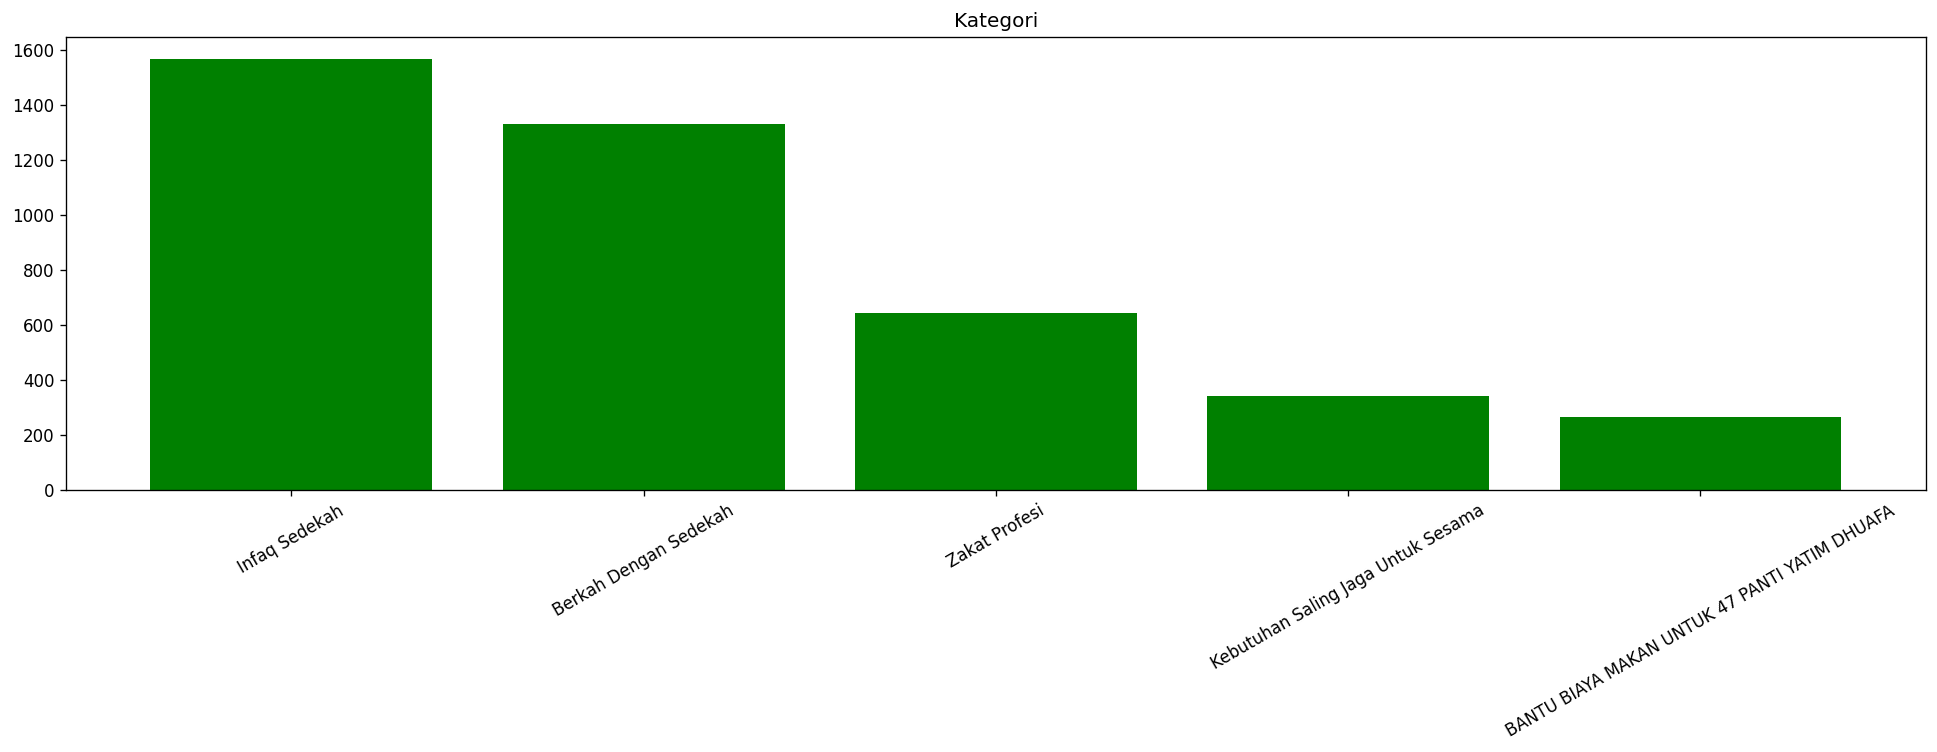

In [ ]:
plt.figure(figsize=(20,5))
a= df['judul'].value_counts().iloc[:5]
b= a.index
plt.bar(b,a, color='green')
plt.title('Kategori')
plt.xticks(rotation='30')

Text(0.5, 1.0, 'Status Pembayaran')

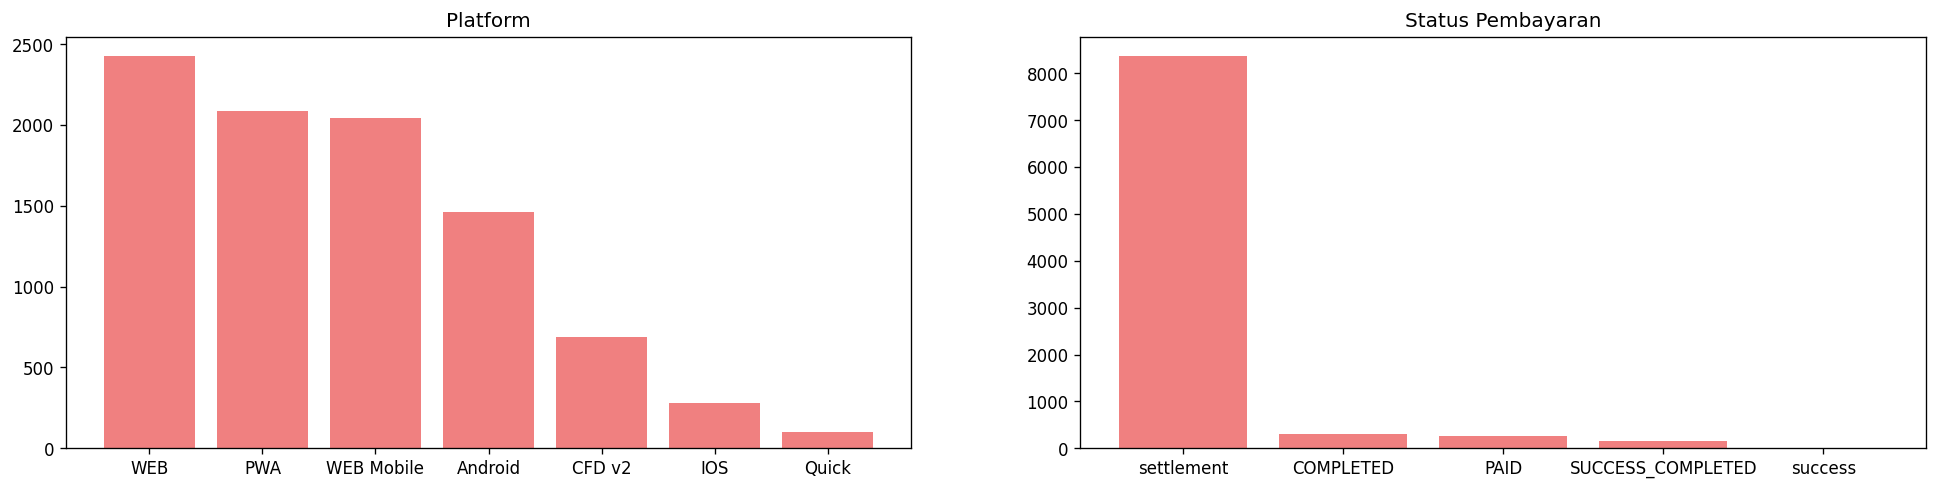

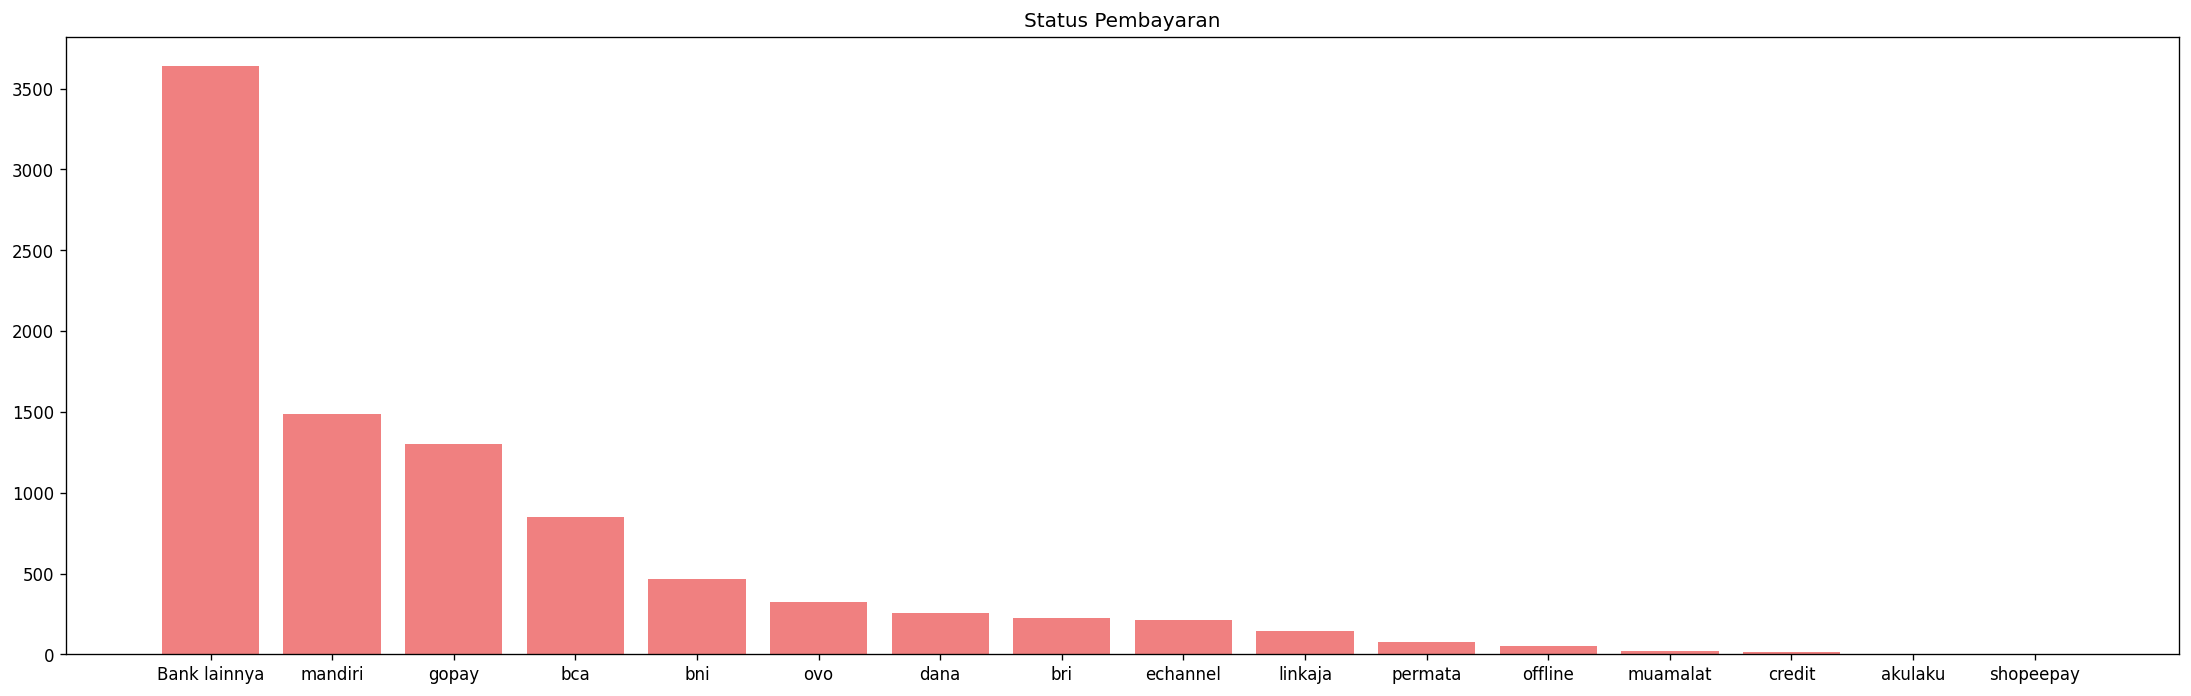

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
a= df['platform'].value_counts()
b= a.index
plt.bar(b,a, color='lightcoral')
plt.title('Platform')


plt.subplot(2, 2, 2)
a= df['status'].value_counts()
b= a.index
plt.bar(b,a, color='lightcoral')
plt.title('Status Pembayaran')

plt.figure (figsize=(50,15))
plt.subplot(2, 2, 3)
a= df['metode_pembayaran'].value_counts()
b= a.index
plt.bar(b,a, color='lightcoral')
plt.title('Status Pembayaran')

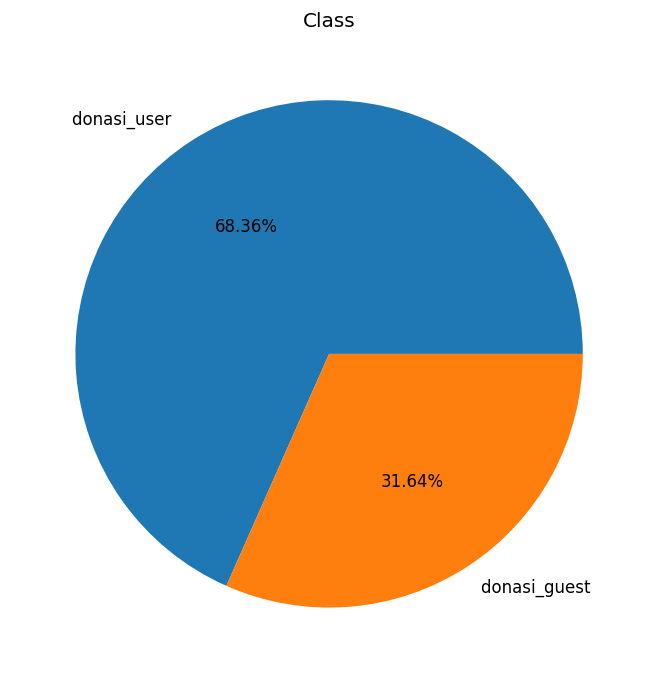

In [ ]:
# Berdasarkan tiap tiap kolom
plt.figure(figsize=(15, 7)) # Membuat ukuran 
# plt.subplot(2, 3, 1) #2 baris, 3 kolom, plot 1
data = df['Class'].value_counts()
label = data.index

plt.pie(data, labels=label, autopct='%.2f%%')
plt.title('Class')

# plt.subplot(2, 3, 2) #2 baris, 3 kolom, plot 2
# data = df['platform'].value_counts()
# label = data.index

# plt.pie(data, labels=label, autopct='%.2f%%')
# plt.title('platform')

# plt.subplot(2, 3, 3) #2 baris, 3 kolom, plot 3
# data = df['status'].value_counts()
# label = data.index

# plt.pie(data, labels=label, autopct='%.2f%%')
# plt.title('status')

# plt.subplot(2, 3, 4) #2 baris, 3 kolom, plot 4
# data = df['metode_pembayaran'].value_counts()
# label = data.index

# plt.pie(data, labels=label, autopct='%.2f%%')
# plt.title('metode_pembayaran')

plt.show() 

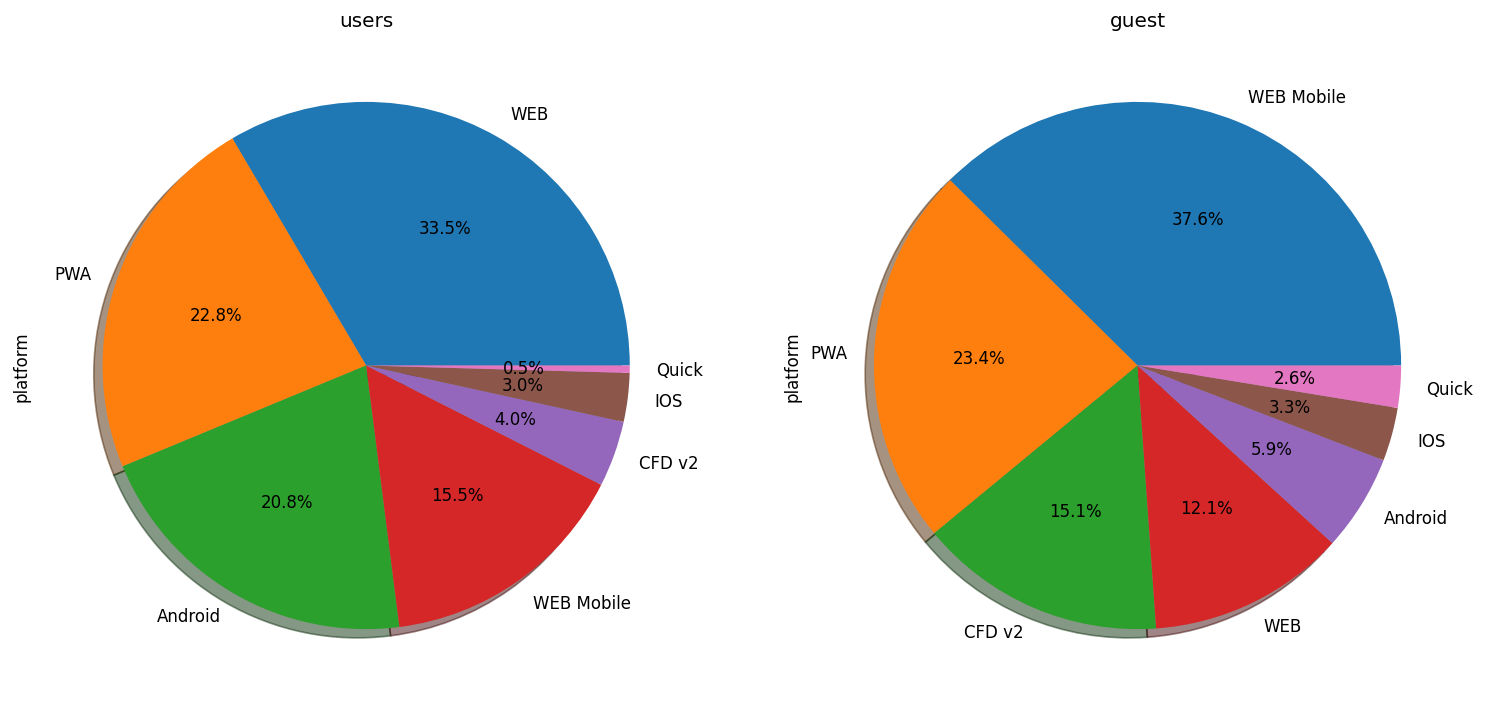

In [ ]:
# Berdasarkan keterangan pada kolom platform
f, axes = plt.subplots(1,2, figsize=(13, 6))
users_data['platform'].value_counts().plot(kind='pie',ax=axes[0], title='users', autopct='%1.1f%%', shadow=True)
guest_data['platform'].value_counts().plot(kind='pie',ax=axes[1], title='guest', autopct='%1.1f%%', shadow=True)

plt.tight_layout()
plt.show()

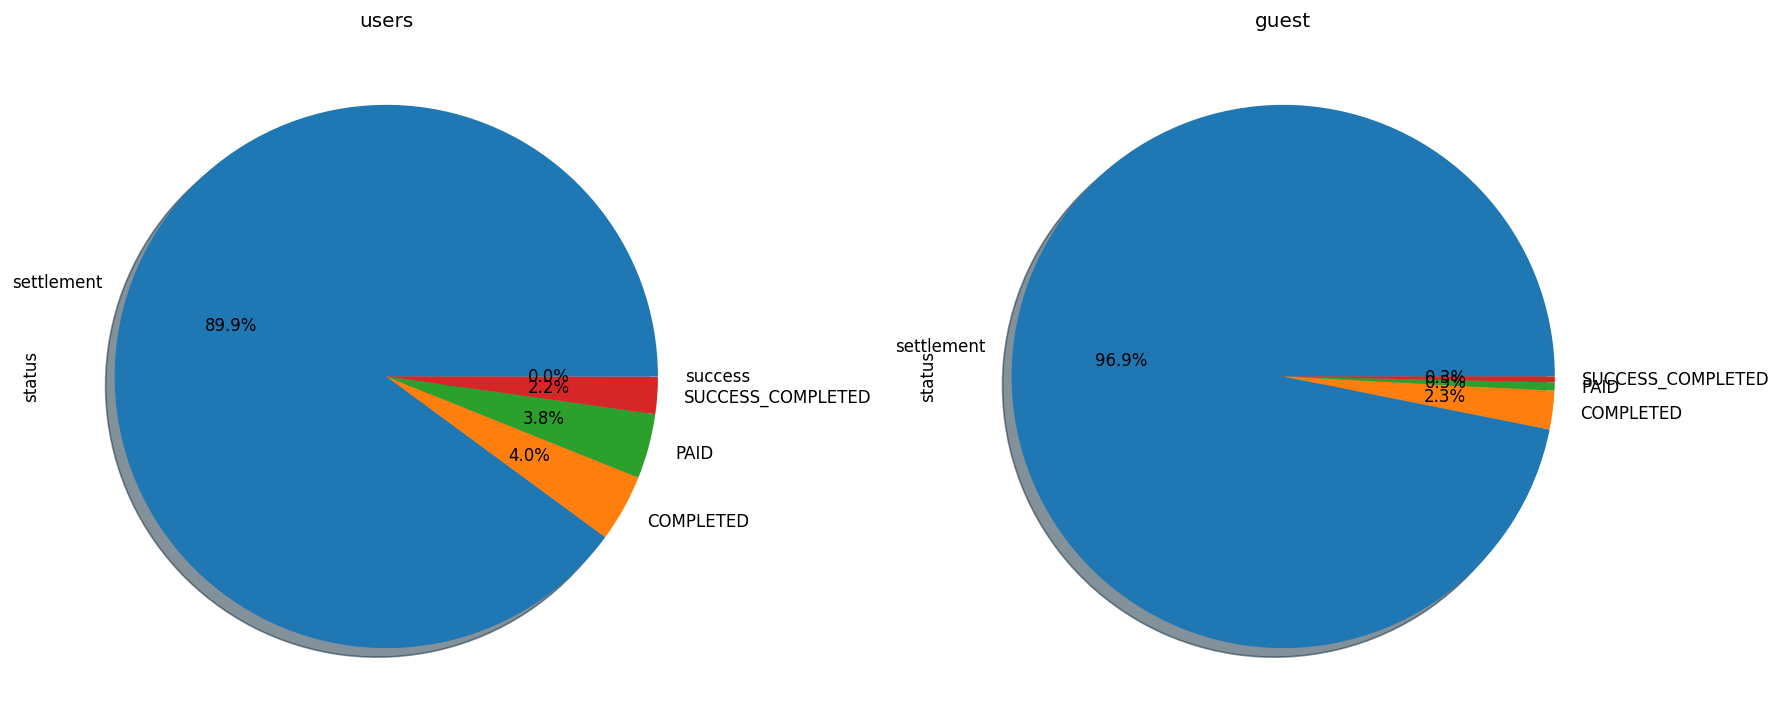

In [ ]:
# Berdasarkan keterangan pada kolom status
f, axes = plt.subplots(1,2, figsize=(15, 20))
users_data['status'].value_counts().plot(kind='pie',ax=axes[0], title='users', autopct='%1.1f%%', shadow=True)
guest_data['status'].value_counts().plot(kind='pie',ax=axes[1], title='guest', autopct='%1.1f%%', shadow=True)

plt.tight_layout()
plt.show()

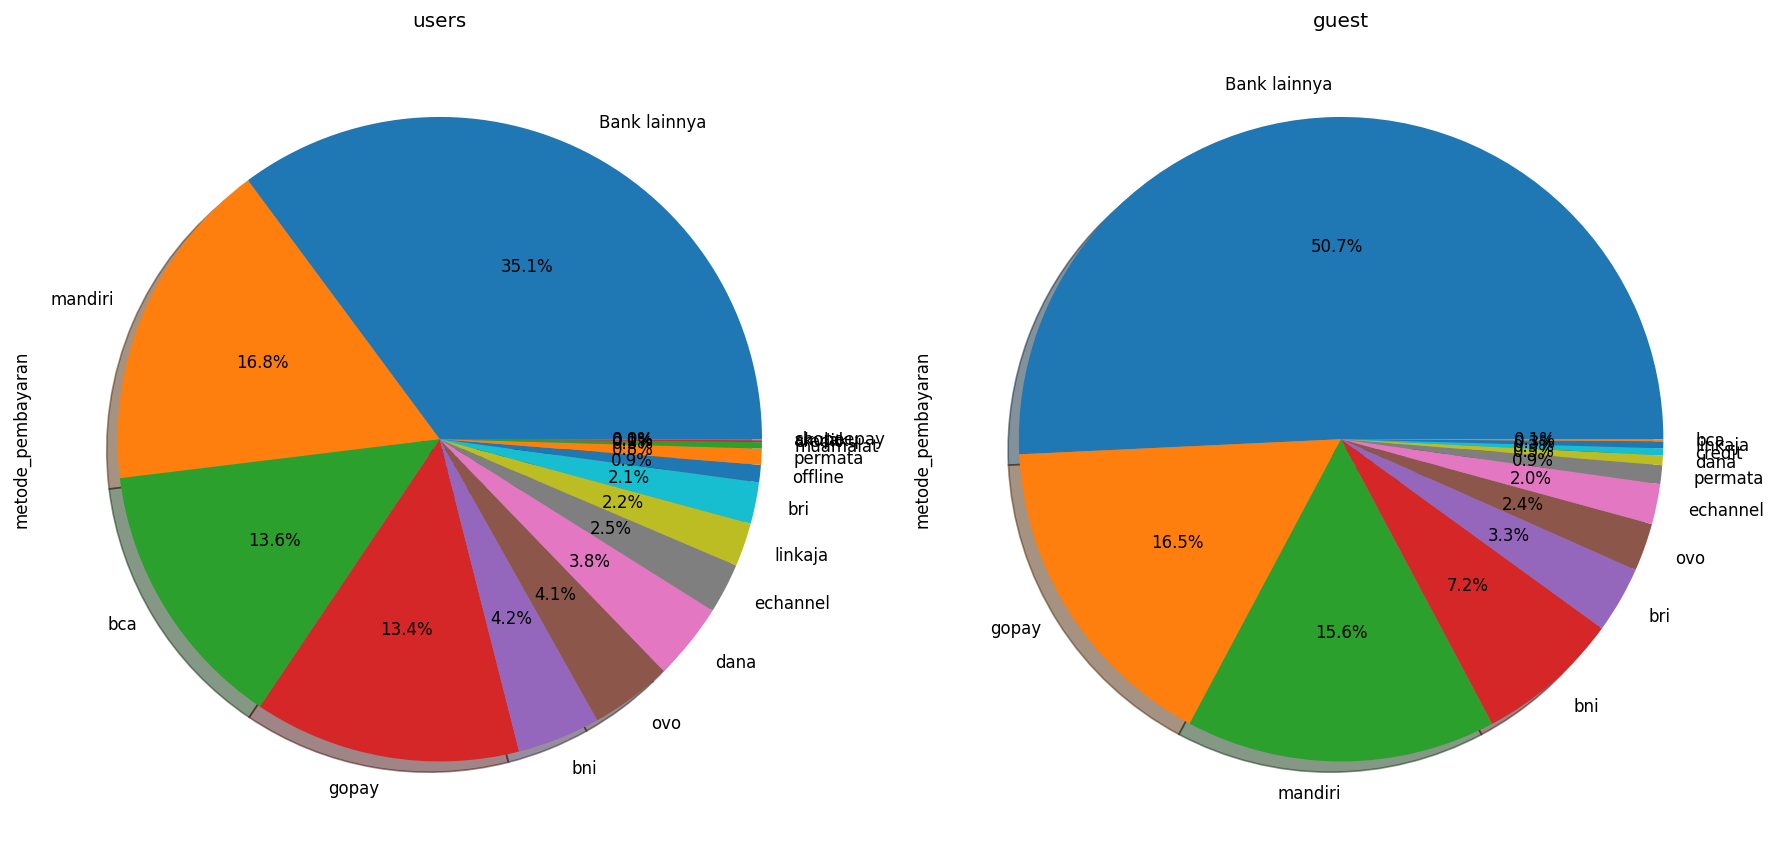

In [ ]:
# Berdasarkan keterangan pada kolom metode pembayaran
f, axes = plt.subplots(1,2, figsize=(15, 20))
users_data['metode_pembayaran'].value_counts().plot(kind='pie',ax=axes[0], title='users', autopct='%1.1f%%', shadow=True)
guest_data['metode_pembayaran'].value_counts().plot(kind='pie',ax=axes[1], title='guest', autopct='%1.1f%%', shadow=True)

plt.tight_layout()
plt.show()

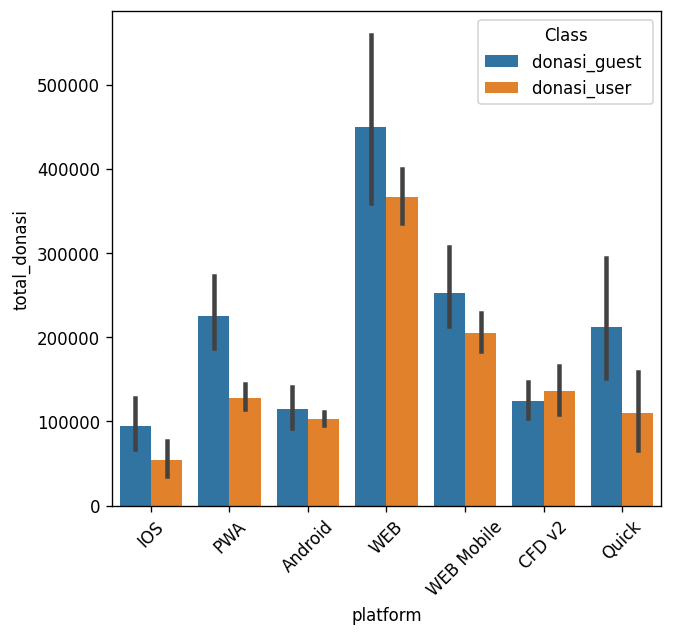

In [ ]:
# Korelasi antar
# Berdasarkan kolom total donasi
plt.figure(figsize=(13, 12))
# Membuat tata letak histogramnya
plt.subplot(2, 2, 1) #2 baris, 2 kolom, plot 1
sns.barplot(x='platform', y='total_donasi',data=df, hue='Class') # total donasi
plt.xticks(rotation='45')   
plt.show()

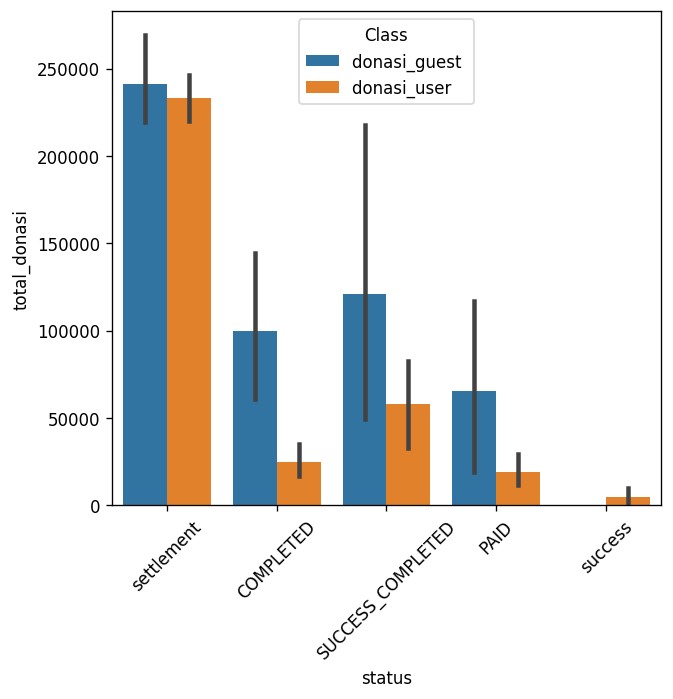

In [ ]:
# Korelasi antar
# Berdasarkan kolom total donasi
plt.figure(figsize=(13, 12))
# Membuat tata letak histogramnya
plt.subplot(2, 2, 1) #2 baris, 2 kolom, plot 1
sns.barplot(x='status', y='total_donasi',data=df, hue='Class') # total donasi
plt.xticks(rotation='45')   
plt.show()

# Preprocessing

In [ ]:
col = ['ID', 'name', 'platform', 'judul', 'status', 'metode_pembayaran', 'Class']

guest_data = guest_data.drop(col, axis=1)

guest_data

,tanggal,total_donasi
0,2021-01-05 05:32:07,20000
1,2021-01-05 14:28:26,130662
2,2021-01-05 19:22:49,25000
3,2021-01-05 21:11:39,100140
4,2021-01-06 00:30:37,50000
...,...,...
2868,2021-12-06 03:31:41,20000
2869,2021-12-06 04:25:45,20000
2870,2021-12-06 04:45:15,20000
2871,2021-12-06 04:51:17,20000


In [ ]:
guest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2873 entries, 0 to 2872
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tanggal       2873 non-null   object
 1   total_donasi  2873 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.3+ KB


In [ ]:
# guest_dat = guest_data.resample('W').sum()
# guest_dat

Text(0.5, 1.0, 'guest per day')

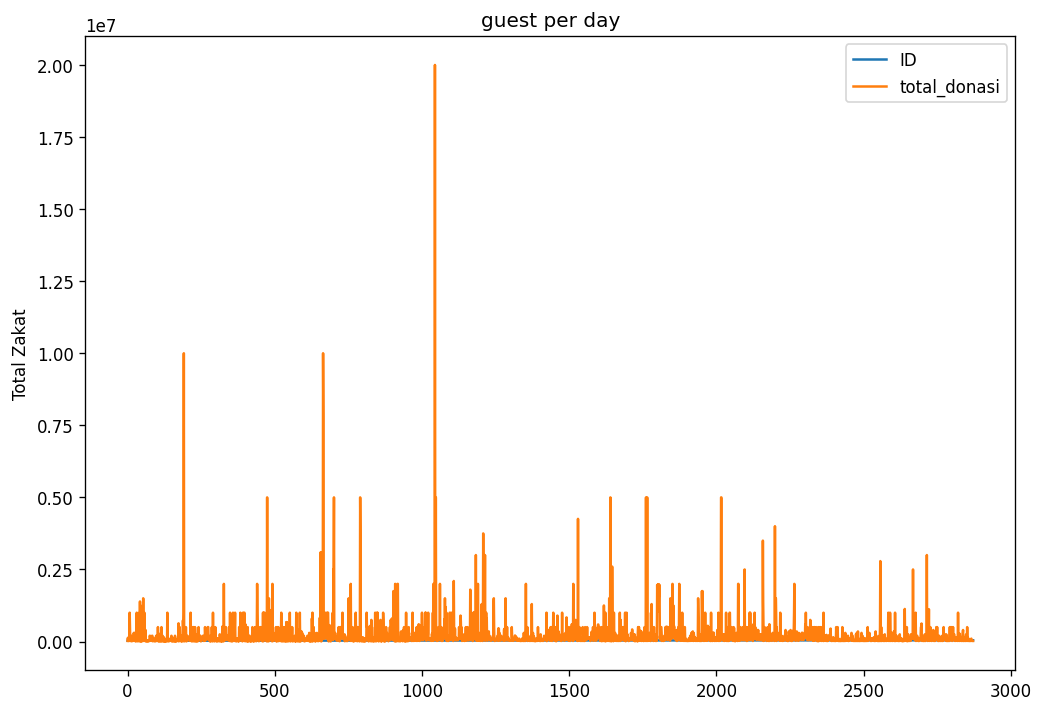

In [ ]:
import matplotlib.pyplot as plt

donasi_guest.plot()
plt.ylabel('Total Zakat')
plt.title('guest per day')

In [ ]:
donasi_user = donasi_user.resample('D').sum()
donasi_user

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt

donasi_user.plot(figsize = (20, 6))
plt.ylabel('Total Zakat')
plt.title('Users per day')

In [ ]:
donasi_guest['total_donasi'].rolling(6).mean().plot(label = '6 month SMA', figsize = (20,6))
donasi_guest['total_donasi'].rolling(12).mean().plot(label = '12 month SMA' )
plt.legend()

In [ ]:
# Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df_ses = donasi_guest.copy()

model_ses = SimpleExpSmoothing(donasi_guest['total_donasi'])
fitted_model_ses = model_ses.fit(smoothing_level=0.3,optimized=False,use_brute=True) # bisa masukin alpha
df_ses['SES'] = fitted_model_ses.fittedvalues

df_ses.head(20)

In [ ]:
df_ses.plot(figsize = (20, 6))

In [ ]:
# Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df_es = donasi_guest.copy()

model = ExponentialSmoothing(donasi_guest['total_donasi'], trend = 'add') # try mul
fitted_model = model.fit()
df_es['ES'] = fitted_model.fittedvalues.shift(-1)

df_es.head(20)

In [ ]:
df_es.plot(figsize = (20, 6))

In [ ]:
train_data = donasi_guest.iloc[:237] # df.loc[:'1940-01-01']
test_data = donasi_guest.iloc[237:]

In [ ]:
fitted_model = ExponentialSmoothing(train_data['total_donasi'],
                                    trend = 'add',
                                    seasonal = 'add', 
                                    seasonal_periods = 12).fit()

In [ ]:
test_predictions = fitted_model.forecast(237)

In [ ]:
train_data['total_donasi'].plot(legend=True, label = 'Train',
                               figsize = (20,6))
test_data['total_donasi'].plot(legend=True, label = 'Test')
test_predictions.plot(legend=True, label = 'Prediction')

# ML Basic

In [ ]:
df_ml = df.copy()
df_ml.drop(['ID', 'tanggal', 'name','platform','judul', 'status', 'metode_pembayaran', 'Class'], axis=1, inplace=True)
df_ml

,total_donasi
0,20000.0
1,130662.0
2,25000.0
3,100140.0
4,50000.0
...,...
9076,100000.0
9077,200000.0
9078,10000.0
9079,150000.0


In [ ]:
def LaggedFeatures(s,lag=2,fillna=True, dropna=False):
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print ('Only works for DataFrame or Series')
        return None
    if dropna:
        res = res.dropna()
    else:
        res = res
    if fillna:
        return res.fillna(0)
    else:
        return res 

In [ ]:
lag1 = LaggedFeatures(df_ml,lag=3,fillna=True, dropna=True)
lag1.shape

(9078, 4)

In [ ]:
train = lag1.iloc[:101]
test = lag1.iloc[101:]
train

,total_donasi,total_donasi_lag1,total_donasi_lag2,total_donasi_lag3
3,100140.0,25000.0,130662.0,20000.0
4,50000.0,100140.0,25000.0,130662.0
5,20000.0,50000.0,100140.0,25000.0
6,200000.0,20000.0,50000.0,100140.0
7,1000315.0,200000.0,20000.0,50000.0
...,...,...,...,...
99,150000.0,18000.0,200000.0,150000.0
100,25000.0,150000.0,18000.0,200000.0
101,100000.0,25000.0,150000.0,18000.0
102,50000.0,100000.0,25000.0,150000.0


In [ ]:
#create X and y

X_train = train.drop(['total_donasi'], axis=1)
X_test = test.drop(['total_donasi'], axis=1)

y_train = train['total_donasi']
y_test = test ['total_donasi']


X_train = X_train.astype(float).values
y_train = y_train.astype(float).values

X_test = X_test.astype(float).values
y_test = y_test.astype(float).values

In [ ]:
# call model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

rf = RandomForestRegressor()
lr = LinearRegression()

#train
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np


y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)


print("Random Forest Regression")
print("MAE: ",mean_absolute_error(y_test,y_pred_rf))
print("MSE: ",mean_squared_error(y_test,y_pred_rf))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("R2: ",r2_score(y_test,y_pred_rf))
print("")

print("Linear Regression")
print("MAE: ",mean_absolute_error(y_test,y_pred_lr))
print("MSE: ",mean_squared_error(y_test,y_pred_lr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("R2: ",r2_score(y_test,y_pred_lr))
print("")


Random Forest Regression
MAE:  220321.7266742787
MSE:  318426513617.66644
RMSE:  564292.9324541168
R2:  -0.07418547479880533

Linear Regression
MAE:  211010.98872046484
MSE:  307098044479.2277
RMSE:  554164.2757154485
R2:  -0.035969822270484286



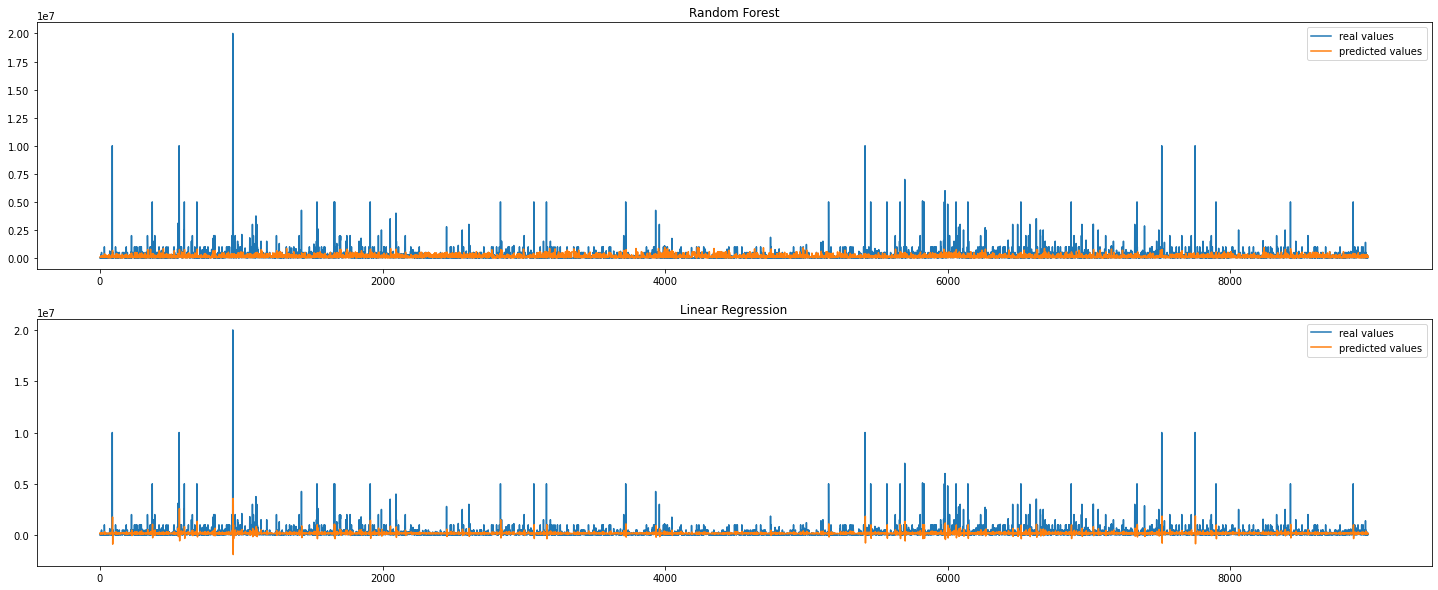

In [ ]:
#Plot untuk melihat hasil
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(25,10)) 

axs[0].plot(y_test,label='real values')
axs[0].plot(y_pred_rf,label='predicted values')
axs[0].set_title("Random Forest")
axs[0].legend()

axs[1].plot(y_test,label='real values')
axs[1].plot(y_pred_lr,label='predicted values')
axs[1].set_title("Linear Regression")
axs[1].legend()

# LSTM

In [ ]:
df_l = pd.read_csv('https://raw.githubusercontent.com/hardiawan3010/datase_zakat/main/donasi.csv', delimiter=',', parse_dates = ['tanggal'], index_col = ['tanggal'])
df_l

,ID,name,platform,judul,total_donasi,status,metode_pembayaran,Class
tanggal,,,,,,,,
2021-01-05 05:32:07,27022,PUTU DARMA PUTRA,IOS,Berkah Dengan Sedekah,20000.0,settlement,gopay,donasi_guest
2021-01-05 14:28:26,27045,Hamba Allah,PWA,PANTI ASUHAN YATIM DAN DHUAFA SALIHARA,130662.0,settlement,Transfer Bank Mandiri - 1320505050535,donasi_guest
2021-01-05 19:22:49,27055,Evi Wirawan,PWA,Infaq Sedekah,25000.0,settlement,bank_transfer,donasi_guest
2021-01-05 21:11:39,27061,Achmadi,PWA,PANTI ASUHAN YATIM DAN DHUAFA BALIKPAPAN,100140.0,settlement,Transfer Bank Mandiri - 1320505050535,donasi_guest
2021-01-06 00:30:37,27083,Lia Soraya,PWA,BANTU BIAYA MAKAN UNTUK 47 PANTI YATIM DHUAFA,50000.0,settlement,bank_transfer,donasi_guest
...,...,...,...,...,...,...,...,...
2021-12-06 08:25:29,43379,Mahfud Rofi,WEB,"Tak ada lagi Orangtua, Nur Ingin Tetap Sekolah",100000.0,settlement,Mandiri - 1320006531140,donasi_user
2021-12-06 08:27:10,43380,Mahfud Rofi,WEB,Berkah Dengan Sedekah,200000.0,settlement,Mandiri - 1320006531140,donasi_user
2021-12-06 08:28:33,43381,Sari Rafif Pasha,WEB,Berkah Dengan Sedekah,10000.0,settlement,BCA - 1393004952,donasi_user


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from pandas.tseries.offsets import DateOffset
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
df_lstm = df_l.copy()
df_lstm.drop(['ID', 'name','platform','judul', 'status', 'metode_pembayaran', 'Class'], axis=1, inplace=True)
df_lstm

,total_donasi
tanggal,
2021-01-05 05:32:07,20000.0
2021-01-05 14:28:26,130662.0
2021-01-05 19:22:49,25000.0
2021-01-05 21:11:39,100140.0
2021-01-06 00:30:37,50000.0
...,...
2021-12-06 08:25:29,100000.0
2021-12-06 08:27:10,200000.0
2021-12-06 08:28:33,10000.0


In [ ]:
df_lstm = df_lstm.resample('D').sum()
df_lstm

,total_donasi
tanggal,
2021-01-01,9104921.0
2021-01-02,18147735.0
2021-01-03,4549815.0
2021-01-04,7592243.0
2021-01-05,5664702.0
...,...
2021-12-02,9457924.0
2021-12-03,21347947.0
2021-12-04,4513792.0


In [ ]:
train_df = df_lstm[:len(df_lstm)-12]
test_df = df_lstm[len(df_lstm)-12:]

In [ ]:
# df_lstm['tanggal'] = pd.to_datetime(df_lstm['tanggal']).dt.date

In [ ]:
df_lstm

,total_donasi
tanggal,
2021-01-01,9104921.0
2021-01-02,18147735.0
2021-01-03,4549815.0
2021-01-04,7592243.0
2021-01-05,5664702.0
...,...
2021-12-02,9457924.0
2021-12-03,21347947.0
2021-12-04,4513792.0


In [ ]:
# df_lstm.set_index('tanggal')

In [ ]:
df_lstm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2021-01-01 to 2021-12-06
Freq: D
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_donasi  340 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_df)
train_lstm = scaler.transform(train_df)
test_lstm = scaler.transform(test_df)

In [ ]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train_lstm, train_lstm, length=n_input, batch_size=6)

In [ ]:
model = Sequential()
model.add(LSTM(400, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=90, verbose= 0)
model.summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 400)               643200    
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 1)                 401       
                                                                 
Total params: 643,601
Trainable params: 643,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred_list = []
batch = train_lstm[-n_input:].reshape((1, n_input, n_features))
for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [ ]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index=df_lstm[-n_input:].index, columns=['Prediction'])
df_test = pd.concat([df_lstm,df_predict], axis=1)

In [ ]:
df_test.tail(15)

,total_donasi,Prediction
tanggal,,
2021-11-22,2836359.0,NaN
2021-11-23,2060090.0,NaN
2021-11-24,1311214.0,NaN
2021-11-25,5250600.0,4.634332e+06
2021-11-26,15481358.0,4.703256e+06
2021-11-27,5825997.0,4.758052e+06
2021-11-28,6470118.0,4.801286e+06
2021-11-29,5009099.0,4.835737e+06
2021-11-30,3503812.0,4.863161e+06


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2021-01-01 to 2021-12-06
Freq: D
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_donasi  340 non-null    float64
 1   Prediction    12 non-null     float64
dtypes: float64(2)
memory usage: 18.0 KB


In [ ]:
print("LSTM")
print("MAE: ",mean_absolute_error(df_test.iloc[-12:,0],df_test.iloc[-12:,1]))
print("MSE: ",mean_squared_error(df_test.iloc[-12:,0],df_test.iloc[-12:,1]))
print("RMSE: ", np.sqrt(mean_squared_error(df_test.iloc[-12:,0],df_test.iloc[-12:,1])))
print("R2: ",r2_score(df_test.iloc[-12:,0],df_test.iloc[-12:,1]))
print("")

LSTM
MAE:  3692083.6511614756
MSE:  36212764071640.37
RMSE:  6017704.219354784
R2:  -0.2077521831699769



No handles with labels found to put in legend.


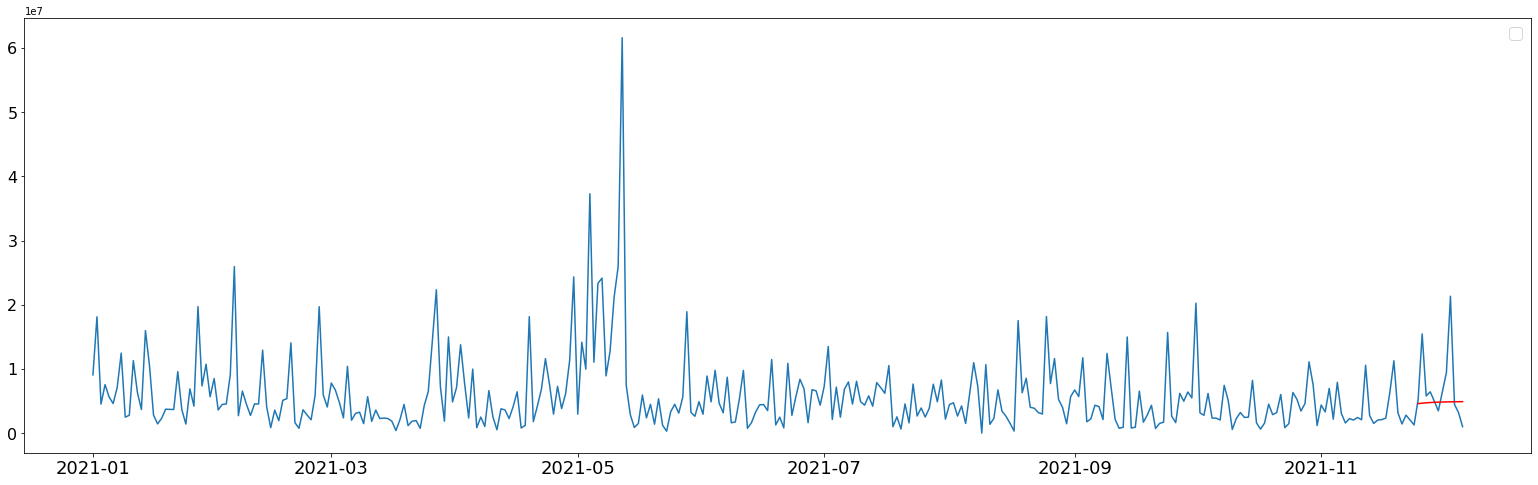

In [ ]:
plt.figure(figsize=(27, 8))
plt.plot(df_test.index, df_test['total_donasi'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()